In [1]:
# For execution in google colab
#!git clone https://github.com/Marlup/Simulation-of-investment-and-compound-returns.git

In [22]:
# data processing
import numpy as np
import pandas as pd
# pyplot
from matplotlib import pyplot as plt
# seaborn
import seaborn as sns
# bokeh
from bokeh import plotting as bk
from bokeh.models import Span
from bokeh.io import output_notebook
from bokeh.models import HoverTool, ColumnDataSource
import os

import compound
# Compound utils
from compound import (
    get_compound_return,
    simulate_compound_return,
    build_dataframe,
    MONTHS_IN_YEAR,
    define_scenario,
    plot_scenario_bokeh
)

output_notebook()

Loading BokehJS ...

In [3]:
CURRENCY = "€"
# For execution in google colab
#os.chdir("./Simulation-of-investment-and-compound-returns")

In [4]:
sns.set_style('darkgrid')
sns.color_palette("Paired")
sns.set_palette("Paired")

## Compound return by theoretical function

In [5]:
# Calculation of composed return. Composed return function
principal_amount = 10_000
annual_contribution = 200 * 12
roi = 0.06
duration_years = 60
compounding_frequency = 1

amount, accum_roi = get_compound_return(
    principal_amount,
    roi,
    compounding_frequency,
    annual_contribution,
    duration_years,
    True
    )
print(f"Total amount {amount}")
print(f"Accumulated roi {accum_roi}")

Total amount 1609384.54
Accumulated roi 32.99


## Simulation of compound return

### One scenario

In [24]:
# @title Investing parameters for yields scenario

# Define initial parameters
initial_principal = 2500 # @param {type:"number", "min": 0.0, "max": 1.0e8}
monthly_contribution = 100 # @param {type:"number", "min": 0.0, "max": 1.0e8}
annual_contribution = 12 * monthly_contribution
inc_contribution_rate = 0.01 # @param {type:"number", "min": 0.0, "max": 0.1}
annual_roi = 0.18 # @param {type:"number", "min": 0.0, "max": 1.0}
duration_years = 10 # @param {type:"number", "min": 0, "max": 150}
retirement_at_years = 30 # @param {type:"number", "min": 0, "max": 150}
monthly_retirement_income = 2000 # @param {type:"number", "min": 0.0, "max": 1.0e4}
inflation_rate = 0.02 # @param {type:"number", "min": 0.0, "max": 0.2}
tax_rate = 0.2 # @param {type:"number", "min": 0.0, "max": 0.3}
 # Compounding once per year
compounding_frequency = 4 # @param {type:"number", "min": 0, "max": 24}

# Calculate the total balance and earnings using the updated function
total_balance, info = compound.simulate_compound_return(
    principal=initial_principal,
    annual_roi=annual_roi,
    yield_frequency=compounding_frequency,
    annual_contribution=annual_contribution,
    inc_contribution_rate=inc_contribution_rate,
    investment_duration=duration_years,
    retirement_at=retirement_at_years,
    monthly_retirement_income=monthly_retirement_income,
    inflation_rate=inflation_rate,
    tax=tax_rate,
    return_series=True
)

print(f"keys: {info.keys()}")


# Calculate total earnings, total input contribution, and earnings per contribution
balances = info['balances']

earnings = info['net_earnings']
total_earnings = sum(earnings)

contributions = info['contributions']
total_contributions = sum(contributions)

# Print the results
print(f"Total balance after {duration_years} years:", round(total_balance, 2))
print("Total earnings:", round(total_earnings, 2))
print("Total contributions:", round(total_contributions, 2))

# Basic plot setup
renderer_e, renderer_b = plot_scenario_bokeh(earnings, balances, w=800)

_ , _ = bk.show(renderer_e, notebook_handle=True), bk.show(renderer_b, notebook_handle=True)


Argument warning: 'investment_duration' must be greater than 'retirement_at'. retirement_at will be ignored (retirement_at = investment_duration) 

keys: dict_keys(['stable_yield', 'contributions', 'before_retirement_contributions', 'gross_earnings', 'net_earnings', 'tax_from_earnings', 'earnings_after_inflation', 'balances'])
Total balance after 10 years: 33213.87
Total earnings: 24359.79
Total contributions: 12625.5


In [14]:
info['balances']

[2515.8069883527455,
 2531.6043144952537,
 2547.3920083701923,
 2715.7593050422406,
 2731.2739318687654,
 2746.779438475983,
 2762.2758539510246,
 2943.2239906091677,
 2958.4270018105294,
 2973.6214670056256,
 2988.807414372588,
 3183.0149334809394,
 3099.1284168292514,
 3114.15591029585,
 3129.1752197078595,
 3331.624489021355,
 3346.315636126881,
 3360.9992009076327,
 3375.6752100316075,
 3592.5471968914408,
 3606.8717294725084,
 3621.1893460138936,
 3635.5000721218635,
 3867.570992600427,
 3760.82845168972,
 3774.9577155732404,
 3789.080458934555,
 4030.163256733494,
 4043.8953858719824,
 4057.621697786265,
 4071.342216348564,
 4328.931041590476,
 4342.234264461131,
 4355.532440604862,
 4368.825592659235,
 4643.807123162358,
 4511.118307434239,
 4524.203974714132,
 4537.285028576951,
 4822.145619166386,
 4834.765292251262,
 4847.3811702188905,
 4859.993273719506,
 5163.716029127853,
 5175.836262184907,
 5187.953588553703,
 5200.068027454067,
 5523.664538166277,
 5361.536410946421,
 

High yield with low contribution

In [11]:
# @title Investing parameters for yields scenario

# Define initial parameters
initial_principal = 2500 # @param {type:"number", "min": 0.0, "max": 1.0e8}
monthly_contribution = 100 # @param {type:"number", "min": 0.0, "max": 1.0e8}
annual_contribution = 12 * monthly_contribution
inc_contribution_rate = 0.01 # @param {type:"number", "min": 0.0, "max": 0.1}
annual_roi = 0.20 # @param {type:"number", "min": 0.0, "max": 1.0}
duration_years = 60 # @param {type:"number", "min": 0, "max": 150}
retirement_at_years = 15 # @param {type:"number", "min": 0, "max": 150}
monthly_retirement_income = 800 # @param {type:"number", "min": 0.0, "max": 1.0e4}
inflation_rate = 0.03 # @param {type:"number", "min": 0.0, "max": 0.2}
tax_rate = 0.2 # @param {type:"number", "min": 0.0, "max": 0.3}
 # Compounding once per year
compounding_frequency = 6 # @param {type:"number", "min": 0, "max": 24}

# Calculate the total balance and earnings using the updated function
total_balance, info = simulate_compound_return(
    principal=initial_principal,
    annual_roi=annual_roi,
    yield_frequency=compounding_frequency,
    annual_contribution=annual_contribution,
    inc_contribution_rate=inc_contribution_rate,
    investment_duration=duration_years,
    retirement_at=retirement_at_years,
    monthly_retirement_income=monthly_retirement_income,
    inflation_rate=inflation_rate,
    tax=tax_rate,
    return_series=True
)

balances = info['balances']
earnings = info['net_earnings']
contributions = sum(info['contributions'])

# Calculate total earnings, total input contribution, and earnings per contribution
total_earnings = sum(earnings)

# Print the results
print(f"Total balance after {duration_years} years:", round(total_balance, 2))
print("Total earnings:", round(total_earnings, 2))
print("Total contribution:", round(contributions, 2))

# Basic plot setup
renderer_e, renderer_b = plot_scenario_bokeh(earnings, balances)

_ , _= bk.show(renderer_e), bk.show(renderer_b)

Total balance after 60 years: -156383.75
Total earnings: 1320838.07
Total contribution: 19427.58


### Multi-scenarios

In [8]:
step_amount = 5_000
max_amount = 20_000
initial_amounts = np.arange(step_amount,
                            max_amount + step_amount,
                            step_amount)
terms = [1, 6, 12]
virtual_returns = np.arange(0.06, 0.1, 0.01).tolist()
annual_contributions = list(map(lambda x: 12 * x, range(50, 500, 50)))
inc_contributions = [0.01, 0.03, 0.05, 0.1]
years_of_investment = [40, 50, 60]#np.arange(30, 30 + 5, 5)
inflation_rates = [0.02, 0.03, 0.04]#np.arange(30, 30 + 5, 5)
retirement_years = [30]
monthly_retirement_incomes = [
    0.5e3,
    1.0e3,
    1.5e3,
    2.0e3
    ]
#tax_rate = [0.25]
tax_rate = ["spain"]
retirement_contribution_rate = [0.1]

results = define_scenario(initial_amounts,
                          virtual_returns,
                          years_of_investment,
                          terms,
                          annual_contributions,
                          inc_contributions,
                          inflation_rates,
                          monthly_retirement_incomes,
                          retirement_years,
                          tax_rate
                          )

df = build_dataframe(results)
df

,initial_amount,roi,duration,term,contribution,inc_contribution,inflation_rate,monthly_retirement_income,retirement_at,tax_rate,stable_yield,total_amount
0,5000,0.06,40,1,600,0.01,0.02,500.0,30,spain,False,-9.973647e+03
1,5000,0.06,40,1,600,0.01,0.02,1000.0,30,spain,False,-6.907724e+04
2,5000,0.06,40,1,600,0.01,0.02,1500.0,30,spain,False,-1.251100e+05
3,5000,0.06,40,1,600,0.01,0.02,2000.0,30,spain,False,-1.803921e+05
4,5000,0.06,40,1,600,0.01,0.03,500.0,30,spain,False,-2.027180e+04
...,...,...,...,...,...,...,...,...,...,...,...,...
77755,20000,0.10,60,12,5400,0.10,0.03,2000.0,30,spain,False,4.921072e+06
77756,20000,0.10,60,12,5400,0.10,0.04,500.0,30,spain,False,3.972811e+06
77757,20000,0.10,60,12,5400,0.10,0.04,1000.0,30,spain,False,3.662888e+06
77758,20000,0.10,60,12,5400,0.10,0.04,1500.0,30,spain,False,3.352277e+06


## Investment scenarios

### Filter the scenarios to adapt to a certain investor

- Initial amount: 10k to 15k
- Maximum return of investment (ROI): 10%
- Maximum term (months): 12
- Annual contribution: 1.2k to 3.8k
- Investment total period (years): 60
- Monthly income after retirement: 500 to 2000
- Annual inflation rate: 2 to 4 %

Final balance must be positive

In [9]:
# Filter cases
initial_amounts = (10_000, 15_000)
max_roi = 0.1
max_term = 12
contributions = (1200, 3800)
#inc_contributions = (0.01, 0.1)
min_years = 60
monthly_retirement_incomes = (500, 2000)
inflation_rates = (0.02, 0.04)

df_positive = df[df["total_amount"] > 0.0]
# Round up 'total_amount'
df_positive["total_amount"] = df_positive["total_amount"].round(1)
print('Cases with positive amount:', df_positive.shape)

# Filter by example case
df_case = df_positive[(df_positive["initial_amount"].between(initial_amounts[0], initial_amounts[1])) & \
                      (df_positive["roi"] <= max_roi) & \
                      (df_positive["term"] <= max_term) & \
                      (df_positive["contribution"].between(contributions[0], contributions[1])) & \
                      #(df_positive["inc_contribution"].between(inc_contributions[0], inc_contributions[1])) & \
                      (df_positive["duration"] >= min_years) & \
                      (df_positive["monthly_retirement_income"].between(monthly_retirement_incomes[0], monthly_retirement_incomes[1])) & \
                      ((df_positive["inflation_rate"].between(inflation_rates[0], inflation_rates[1])))
                      ].sort_values(["roi", "term", "total_amount", "monthly_retirement_income", "contribution"],
                                    ascending=[True, True, False, False, False])
df_case

Cases with positive amount: (54488, 12)


C:\Users\marsu\AppData\Local\Temp\ipykernel_3896\1881860616.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_positive["total_amount"] = df_positive["total_amount"].round(1)


,initial_amount,roi,duration,term,contribution,inc_contribution,inflation_rate,monthly_retirement_income,retirement_at,tax_rate,stable_yield,total_amount
41748,15000,0.06,60,1,3600,0.10,0.02,500.0,30,spain,True,1791411.7
22308,10000,0.06,60,1,3600,0.10,0.02,500.0,30,spain,True,1766052.1
41749,15000,0.06,60,1,3600,0.10,0.02,1000.0,30,spain,True,1518281.8
22309,10000,0.06,60,1,3600,0.10,0.02,1000.0,30,spain,True,1492922.2
41700,15000,0.06,60,1,3000,0.10,0.02,500.0,30,spain,True,1469282.9
...,...,...,...,...,...,...,...,...,...,...,...,...
57962,15000,0.10,60,12,1200,0.05,0.02,1500.0,30,spain,False,7452.2
57989,15000,0.10,60,12,1800,0.01,0.03,1000.0,30,spain,False,4862.3
58014,15000,0.10,60,12,1800,0.05,0.03,1500.0,30,spain,False,2859.8
58083,15000,0.10,60,12,3000,0.01,0.02,2000.0,30,spain,False,832.0


The financial outcomes the investor want

In [10]:
case_ini_amount = 10_000
case_years = 60

case_monthly_contribution = 200
case_annual_contribution = case_monthly_contribution * MONTHS_IN_YEAR
retir_income = 1000

In [11]:
three_cases = df[(df["initial_amount"] == case_ini_amount) & \
                 (df["duration"] == case_years) & \
                 (df["contribution"] == case_annual_contribution) & \
                 (df["monthly_retirement_income"] == retir_income)
                ]
three_cases.head()

,initial_amount,roi,duration,term,contribution,inc_contribution,inflation_rate,monthly_retirement_income,retirement_at,tax_rate,stable_yield,total_amount
22177,10000,0.06,60,1,2400,0.01,0.02,1000.0,30,spain,False,-147827.545501
22181,10000,0.06,60,1,2400,0.01,0.03,1000.0,30,spain,False,-168173.992469
22185,10000,0.06,60,1,2400,0.01,0.04,1000.0,30,spain,False,-169324.841785
22189,10000,0.06,60,1,2400,0.03,0.02,1000.0,30,spain,False,-88812.598144
22193,10000,0.06,60,1,2400,0.03,0.03,1000.0,30,spain,False,-136971.535109


### Three result cases

Pesimistic case:
- €10,000 initial amount
- 30 years of investment duration
- 12 months term
- €200 monthly contribution
- 1 % annual contribution increment
- €1,000 of retirement income
- 10 % of income from retirement to contribution
- 4 % mean inflation rate

Number of cases: 5


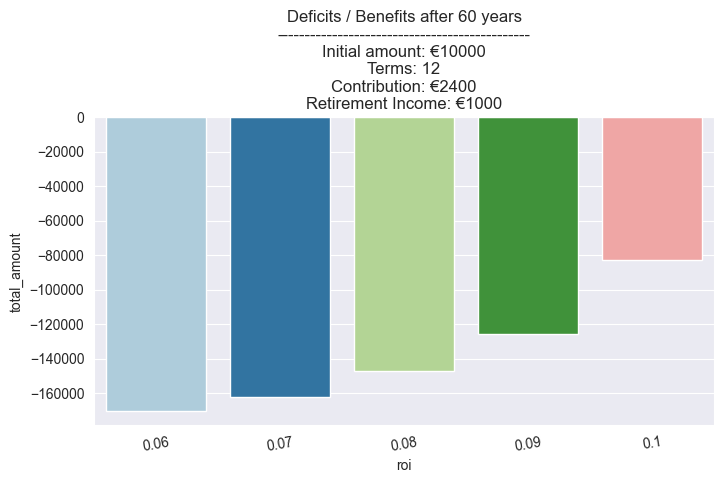

In [12]:
case_terms = 12
inc_contribution = 0.01
inflation_rate = 0.04

case_rois = three_cases[
    (three_cases["term"] == case_terms) & \
    (three_cases["monthly_retirement_income"] == retir_income) & \
    (three_cases["inc_contribution"] == inc_contribution) & \
    (three_cases["inflation_rate"] == inflation_rate)
][["roi", "total_amount"]].round(2)

print(f"Number of cases: {case_rois.shape[0]}")

plt.figure(figsize=(8, 4))
_ = sns.barplot(data=case_rois,
                x="roi",
                y="total_amount",
               )

title = f"Initial amount: {CURRENCY}{case_ini_amount}\nTerms: {case_terms}\nContribution: {CURRENCY}{case_annual_contribution}\nRetirement Income: {CURRENCY}{retir_income}"
_ = plt.title(f"Deficits / Benefits after {case_years} years\n----------------------------------------------\n"+ title)
_ = plt.xticks(rotation=10)

Moderated case:
- €10,000 initial amount
- 30 years of investment duration
- 12 months term
- €200 monthly contribution
- 3 % annual contribution increment
- €1,000 of retirement income
- 10 % of income from retirement to contribution
- 3 % mean inflation rate

Number of cases: 5


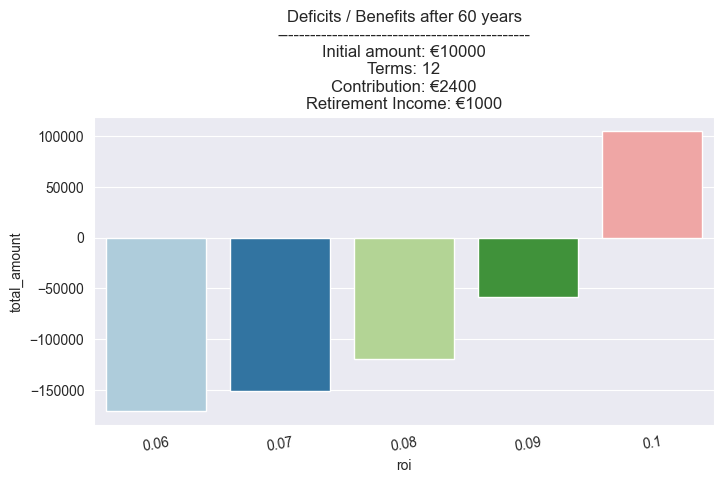

In [13]:
case_terms = 12
inc_contribution = 0.01
inflation_rate = 0.03

case_rois = three_cases[
    (three_cases["term"] == case_terms) & \
    (three_cases["monthly_retirement_income"] == retir_income) & \
    (three_cases["inc_contribution"] == inc_contribution) & \
    (three_cases["inflation_rate"] == inflation_rate)
][["roi", "total_amount"]].round(2)

print(f"Number of cases: {case_rois.shape[0]}")

plt.figure(figsize=(8, 4))
_ = sns.barplot(data=case_rois,
                x="roi",
                y="total_amount",
               )

title = f"Initial amount: {CURRENCY}{case_ini_amount}\nTerms: {case_terms}\nContribution: {CURRENCY}{case_annual_contribution}\nRetirement Income: {CURRENCY}{retir_income}"
_ = plt.title(f"Deficits / Benefits after {case_years} years\n----------------------------------------------\n"+ title)
_ = plt.xticks(rotation=10)

Optimistic case:
- €10,000 initial amount
- 30 years of investment duration
- 1 months term
- €200 monthly contribution
- 5 % annual contribution increment
- €1,000 of retirement income
- 10 % of retirement income to contribution
- 2 % mean inflation rate

Number of cases: 5


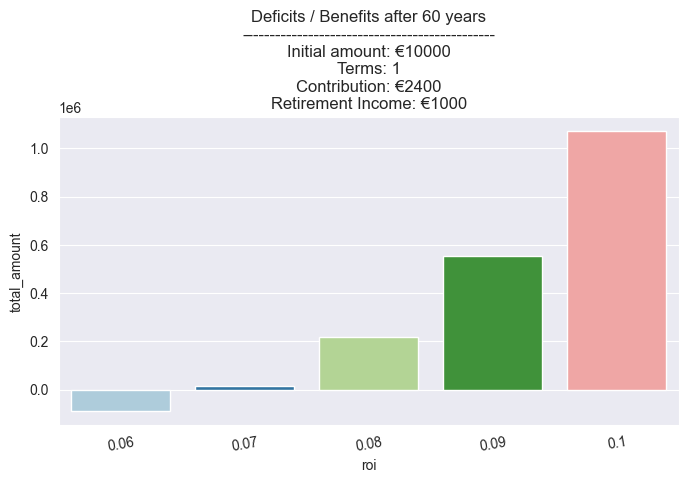

In [14]:
case_terms = 1
inc_contribution = 0.03
inflation_rate = 0.02

case_rois = three_cases[
    (three_cases["term"] == case_terms) & \
    (three_cases["monthly_retirement_income"] == retir_income) & \
    (three_cases["inc_contribution"] == inc_contribution) & \
    (three_cases["inflation_rate"] == inflation_rate)
][["roi", "total_amount"]].round(2)

print(f"Number of cases: {case_rois.shape[0]}")

plt.figure(figsize=(8, 4))
_ = sns.barplot(data=case_rois,
                x="roi",
                y="total_amount",
               )

title = f"Initial amount: {CURRENCY}{case_ini_amount}\nTerms: {case_terms}\nContribution: {CURRENCY}{case_annual_contribution}\nRetirement Income: {CURRENCY}{retir_income}"
_ = plt.title(f"Deficits / Benefits after {case_years} years\n----------------------------------------------\n"+ title)
_ = plt.xticks(rotation=10)